In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 50.8MB/s 
     |████████████████████████████████| 450kB 11.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=fb3f5c26dec51f071ee87169106fcbb2efd5e6529f70a52793dfd1d032824717
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installa

In [2]:
!nvidia-smi

Sat Mar 13 11:30:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
import os
import csv

In [4]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [7]:
!mkdir processed_data

In [5]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

dat.head() will help us take a sneak peak at the data, that we have imported .

In [6]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
data.shape

(7254, 27)

In [6]:
data1 = pd.read_csv('/content/output_1.csv')

In [7]:
data1.shape

(3300, 27)

As the images differ in the sizes so we will try to put images into same dimensions , for ease of processing.
We will try to make their dimension of 350*350.






In [8]:
img_width = 350
img_height = 350

x =[]

  
for i in tqdm(range(data1.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data1['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)
x=np.array(x)
# image.save_img(path = '/content/processed_data/', x, data_format=None, file_format='jpg', scale=False)


100%|██████████| 3300/3300 [00:13<00:00, 246.59it/s]


In [13]:
!rm -rf /content/*


In [9]:
def split_csv(filehandler, delimiter=',', row_limit=3300, 
    output_name_template='output_%s.csv', output_path='.', keep_headers=True):
  reader = csv.reader(filehandler, delimiter=delimiter)
  current_piece = 1
  current_out_path = os.path.join(
    output_path,
    output_name_template  % current_piece
  )
  current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
  current_limit = row_limit
  if keep_headers:
    headers = next(reader)
    current_out_writer.writerow(headers)
  for i, row in enumerate(reader):
    if i + 1 > current_limit:
        current_piece += 1
        current_limit = row_limit * current_piece
        current_out_path = os.path.join(
           output_path,
           output_name_template  % current_piece
        )
        current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
        if keep_headers:
            current_out_writer.writerow(headers)
    current_out_writer.writerow(row)

In [12]:
split_csv(open('/content/Movies-Poster_Dataset/train.csv','r'));

In [ ]:
data2 = pd.read_csv('/content/output_2.csv')

In [ ]:
data2.shape

In [ ]:
y =[]
for i in tqdm(range(data2.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data2['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  y.append(img)
y = np.array(y )


In [ ]:
x=[1,2,3,4,]
x = np.array(x)

In [ ]:
np.append(x,[2,6])

In [10]:
x.shape

(3300, 350, 350, 3)

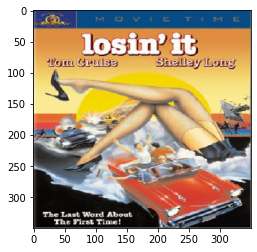

In [17]:
plt.imshow(x[104])

In [18]:
data1['Genre'][104]

"['Comedy']"

In [11]:
y = data1.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(3300, 25)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

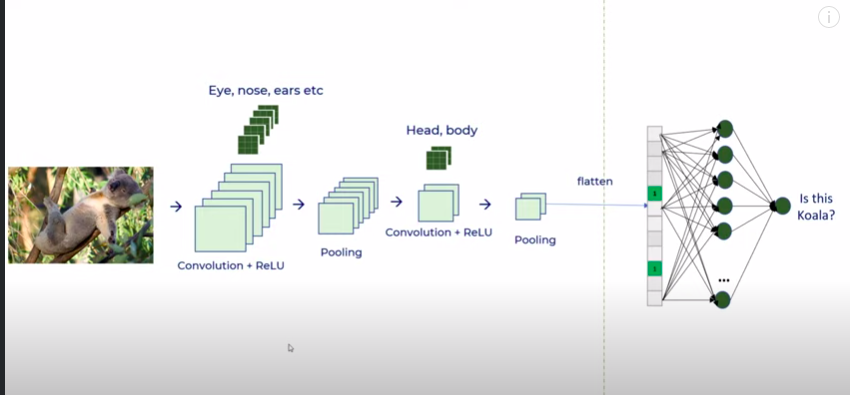



In [14]:
x_train[0].shape

(350, 350, 3)

In [22]:
model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 128)     3584      
_________________________________________________________________
batch_normalization_6 (Batch (None, 348, 348, 128)     512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 128)     0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 174, 174, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 128)     147584    
_________________________________________________________________
batch_normalization_7 (Batch (None, 172, 172, 128)     512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 128)      

In [24]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Train on 2475 samples, validate on 825 samples
Epoch 1/5
2475/2475 [==============================] - 52s 21ms/sample - loss: 0.8679 - accuracy: 0.5292 - val_loss: 2.0801 - val_accuracy: 0.4893
Epoch 2/5
2475/2475 [==============================] - 43s 17ms/sample - loss: 0.6881 - accuracy: 0.6243 - val_loss: 0.7536 - val_accuracy: 0.5978
Epoch 3/5
2475/2475 [==============================] - 42s 17ms/sample - loss: 0.5098 - accuracy: 0.7724 - val_loss: 0.3646 - val_accuracy: 0.8629
Epoch 4/5
2475/2475 [==============================] - 42s 17ms/sample - loss: 0.3540 - accuracy: 0.8758 - val_loss: 0.2695 - val_accuracy: 0.9089
Epoch 5/5
2475/2475 [==============================] - 42s 17ms/sample - loss: 0.2864 - accuracy: 0.8996 - val_loss: 0.2466 - val_accuracy: 0.9089


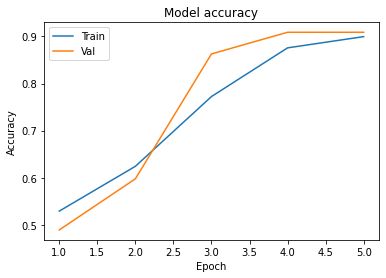

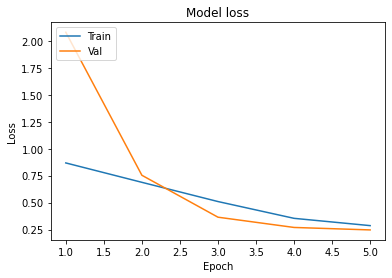

In [25]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Adventure


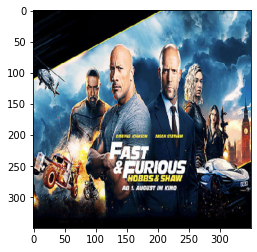

In [26]:
img = image.load_img('/content/Movies-Poster_Dataset/fast.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data1.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


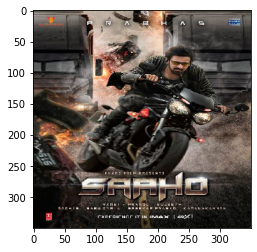

In [27]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data1.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Adventure


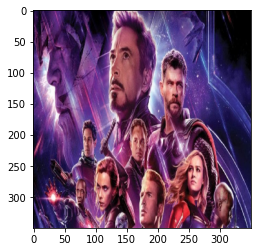

In [28]:
img = image.load_img('/content/Movies-Poster_Dataset/endgame.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data1.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])